# California Housing Price Prediction

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

## Analysis Tasks to be performed:
Build a model of housing prices to predict median house values in California using the provided dataset.
Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
Predict housing prices based on median_income and plot the regression chart for it.

In [1]:
#Import Necessary Libraries:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [36]:
#read the data file
housing = pd.read_csv("./housing.csv")

##  Basic Data Analysis or Exploratory Data Analysis

In [3]:
print("The number of rows and colums are {} and also called shape of the matrix".format(housing.shape))
print("Columns names are \n {}".format(housing.columns))

The number of rows and colums are (20640, 10) and also called shape of the matrix
Columns names are 
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Univariate Analysis

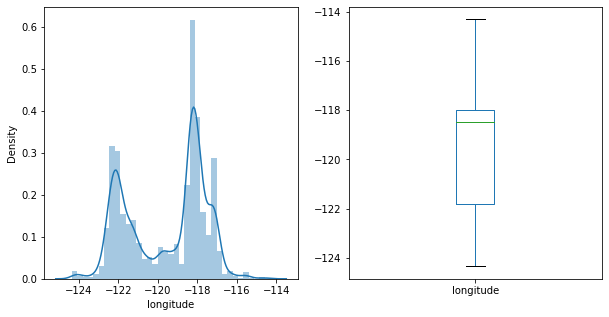

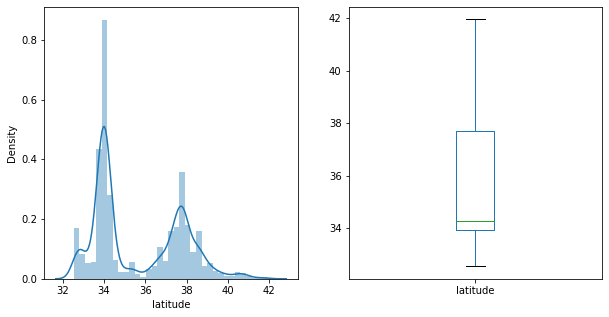

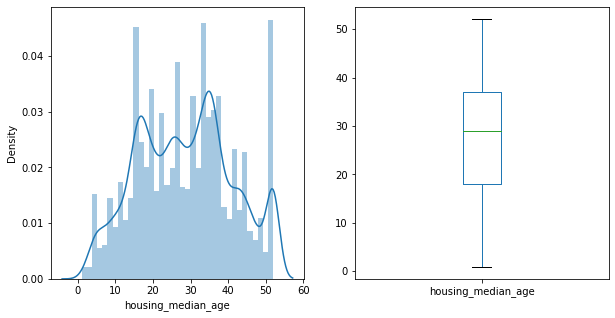

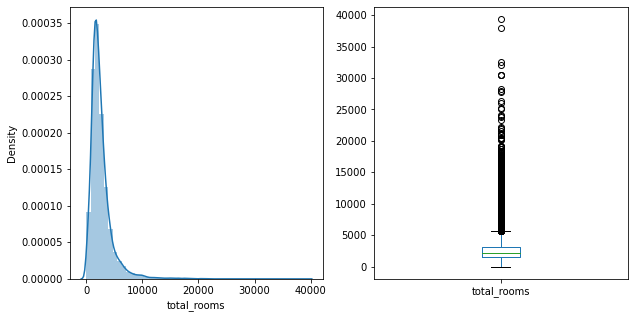

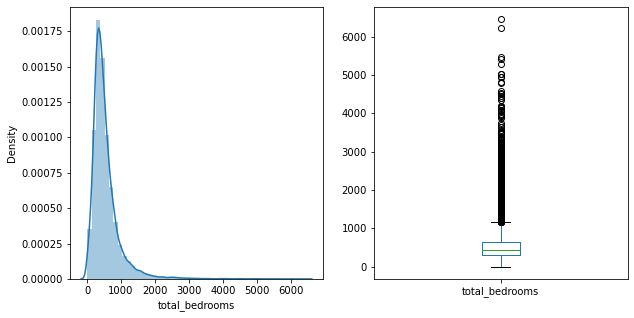

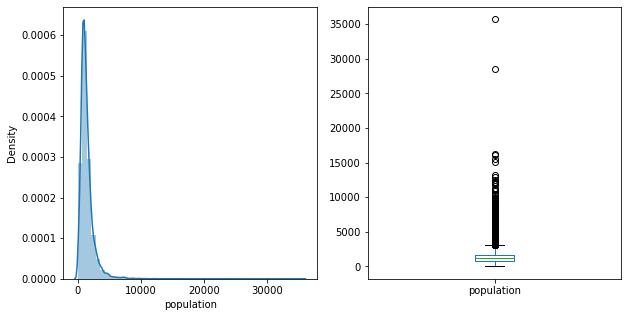

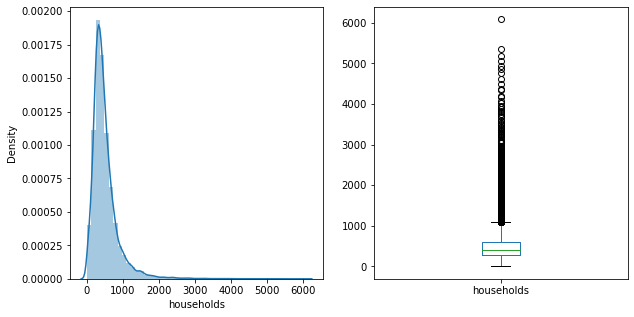

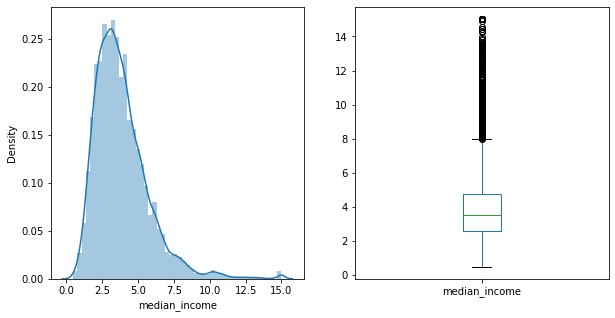

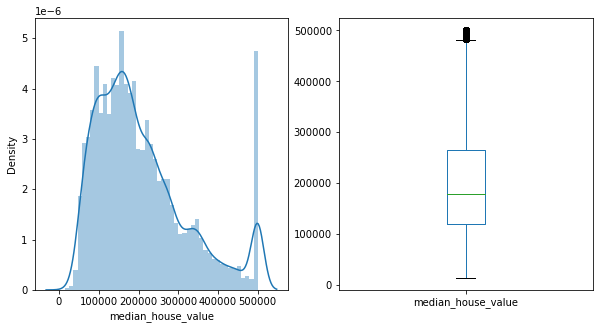

In [12]:
for col in housing.columns[:-1]:
    plt.figure(1)
    plt.subplot(121) 
    sns.distplot(housing[col]); 
    plt.subplot(122)
    housing[col].plot.box(figsize=(10,5)) 
    plt.show()

## Univariate Analysis(if target variable is Numerical)


<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

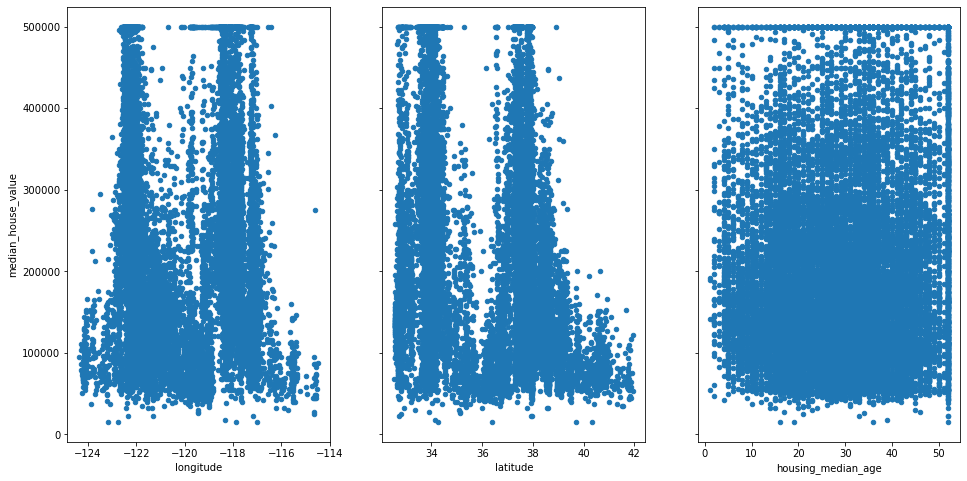

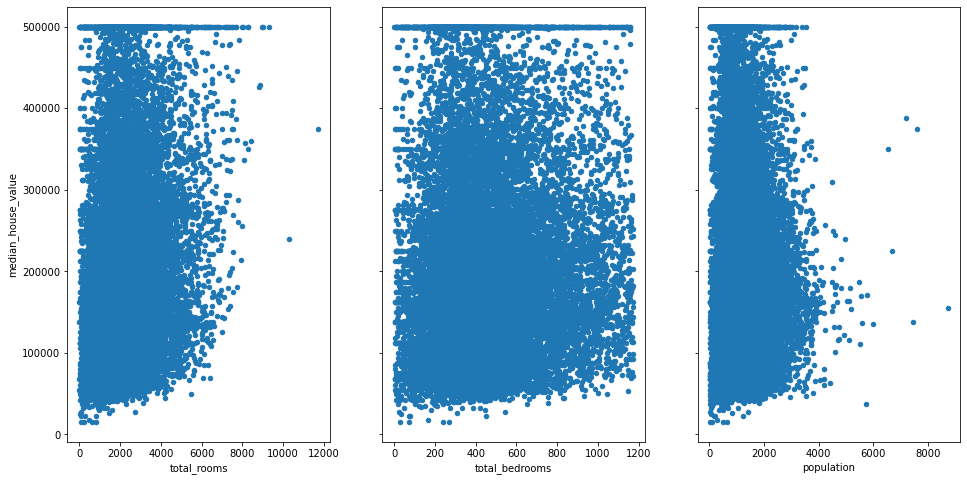

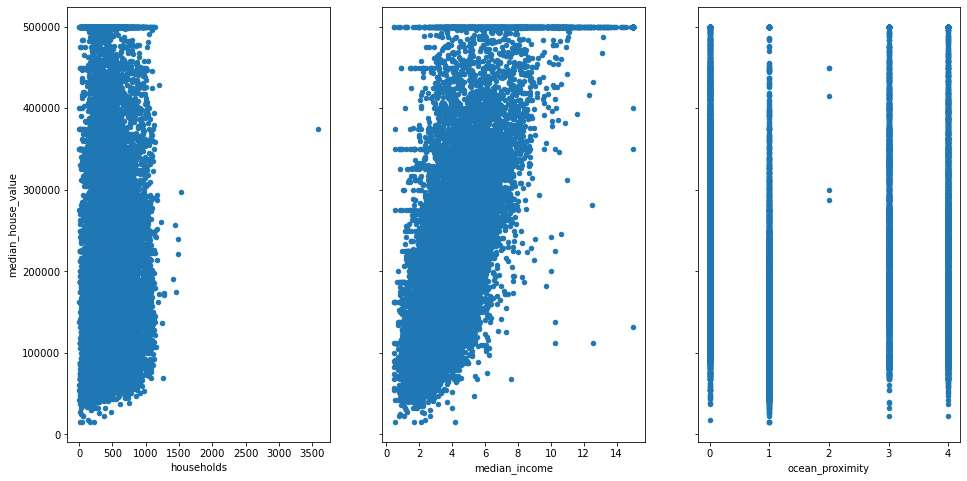

In [30]:
#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
housing.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
housing.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))
housing.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
housing.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))
housing.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
housing.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))

#plot graphs
fig,axs=plt.subplots(1,3,sharey=True)
housing.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))
housing.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
housing.plot(kind='scatter',x='ocean_proximity',y='median_house_value',ax=axs[2],figsize=(16,8))

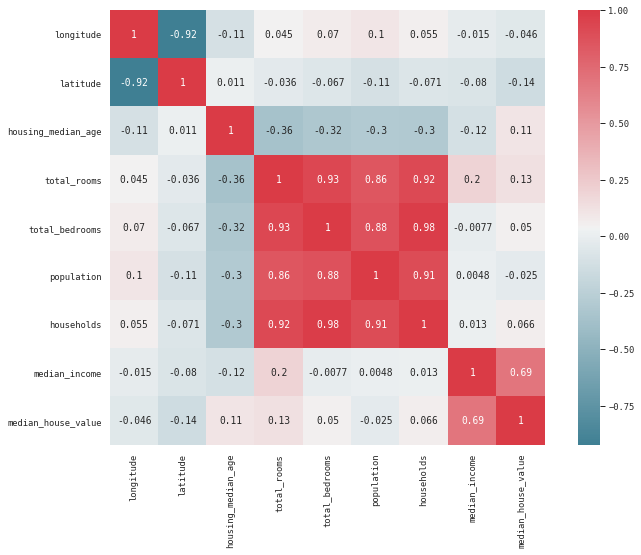

In [9]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
housing_corr_matrix = housing.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

### Outlier Treatment
An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot.

As we saw earlier in univariate analysis, varaible can contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

In [37]:
Q1 = housing.quantile(0.25)
Q3 = housing.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

longitude                  3.79000
latitude                   3.78000
housing_median_age        19.00000
total_rooms             1700.25000
total_bedrooms           351.00000
population               938.00000
households               325.00000
median_income              2.17985
median_house_value    145125.00000
dtype: float64


In [38]:
print(housing.shape)
lowerBound = Q1["total_bedrooms"]-1.5*IQR["total_bedrooms"]
upperBound = Q3["total_bedrooms"] +1.5*IQR["total_bedrooms"]

#b = df[(df['a'] > 1) & (df['a'] < 5)]
data = housing[(housing["total_bedrooms"] < lowerBound) | (housing["total_bedrooms"] > upperBound)]

housing = housing[~housing["total_bedrooms"].isin(data["total_bedrooms"])]

print(housing.shape)

(20640, 10)
(19369, 10)


## Handle missing values

In [39]:
# Finding the null values.
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [40]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mode()[0], inplace=True)

In [41]:
# Finding the null values.
print(housing.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Label encode for categorical feature (ocean_proximity)


In [42]:
labelEncoder = LabelEncoder()
print(housing["ocean_proximity"].value_counts())
housing["ocean_proximity"] = labelEncoder.fit_transform(housing["ocean_proximity"])
print(housing["ocean_proximity"].value_counts())
housing.describe()

<1H OCEAN     8570
INLAND        6100
NEAR OCEAN    2534
NEAR BAY      2160
ISLAND           5
Name: ocean_proximity, dtype: int64
0    8570
1    6100
4    2534
3    2160
2       5
Name: ocean_proximity, dtype: int64


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000,19369.000000
mean,-119.597728,35.656088,29.397439,2258.836491,456.131034,1245.029532,430.054572,3.867155,205994.868398,1.173318
std,2.000617,2.144167,12.380579,1244.562829,236.173865,702.310112,223.765232,1.916528,115891.186285,1.426992
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.810000,33.940000,19.000000,1407.000000,284.000000,766.000000,273.000000,2.553600,118200.000000,0.000000
50%,-118.530000,34.270000,30.000000,2038.000000,414.000000,1119.000000,392.000000,3.527200,178300.000000,1.000000
75%,-118.030000,37.720000,38.000000,2898.000000,592.000000,1594.000000,557.000000,4.740400,263800.000000,1.000000
max,-114.490000,41.950000,52.000000,11709.000000,1173.000000,8733.000000,3589.000000,15.000100,500001.000000,4.000000


In [44]:
# Get column names first
names = housing.columns
# Create the Scaler object
scaler = StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(housing)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.315764,1.037218,0.937182,-1.107917,-1.385164,-1.314310,-1.358846,2.326165,2.127957,1.280126
1,-1.310766,1.027891,-0.678293,3.889148,2.751726,1.645997,3.163868,2.313746,1.315968,1.280126
2,-1.320763,1.023227,1.825694,-0.636253,-1.126873,-1.066550,-1.130922,1.768997,1.260742,1.280126
3,-1.325762,1.023227,1.825694,-0.791332,-0.936330,-0.978268,-0.943221,0.926671,1.167549,1.280126
4,-1.325762,1.023227,1.825694,-0.507691,-0.745788,-0.968300,-0.764457,-0.010934,1.175315,1.280126


In [46]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity']
X=scaled_df[X_Features].values
Y=scaled_df['median_house_value'].values

print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(15495, 9) (15495,)
(3874, 9) (3874,)


## Apply Various Algorithms:
1. Linear Regression
2. Lasso
4. Ridge

### Perform Linear Regression :
1. Perform Linear Regression on training data.
2. Predict output for test dataset using the fitted model.
3. Print root mean squared error (RMSE) from Linear Regression.


In [48]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [49]:
y_predict = linreg.predict(x_test)

print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.5961128497914089
0.6590512333574114


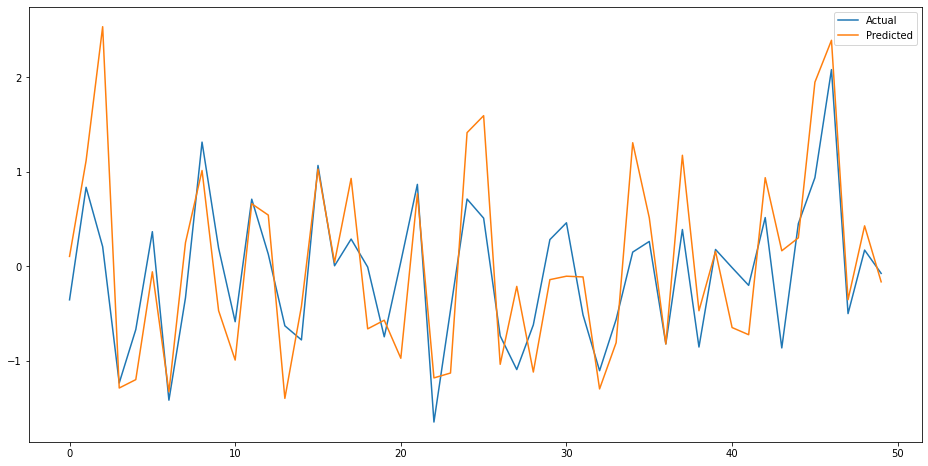

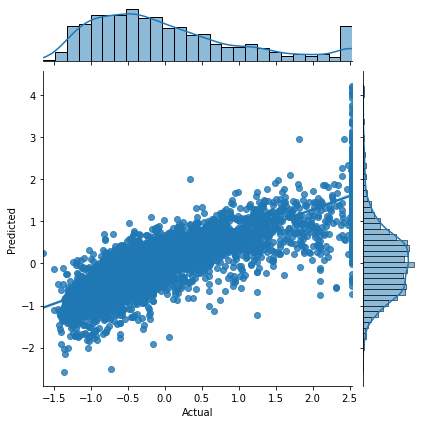

In [53]:
test = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

### Perform Lasso Regression (determine which variables should be retained in the model):
1. Perform Lasso Regression on training data.
2. Predict output for test dataset using the fitted model.
3. Print RMSE (root mean squared error) from Lasso Regression

In [50]:
lassoreg=Lasso(alpha=0.001,normalize=True)
lassoreg.fit(x_train,y_train)

print(sqrt(mean_squared_error(y_test,lassoreg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(lassoreg.score(x_test,y_test)))

0.7343010343438329
R2 Value/Coefficient of determination:0.4826547850652959


### Perform Ridge Regression (addresses multicollinearity issues) :
1. Perform Ridge Regression on training data.
2. Predict output for test dataset using the fitted model.
3. Print RMSE (root mean squared error) from Ridge Regression.

In [52]:
ridgereg=Ridge(alpha=0.001,normalize=True)
ridgereg.fit(x_train,y_train)
             
print(sqrt(mean_squared_error(y_test,ridgereg.predict(x_test))))
print('R2 Value/Coefficient of determination:{}'.format(ridgereg.score(x_test,y_test)))

0.5964318992546599
R2 Value/Coefficient of determination:0.6586861728446864


## Perform Linear Regression with one independent variable :
1. Extract just the median_income column from the independent variables (from X_train and X_test).
2. Perform Linear Regression to predict housing values based on median_income.
3. Predict output for test dataset using the fitted model.
4. Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [54]:
X=scaled_df['median_income'].values
Y=scaled_df['median_house_value'].values

print(X.shape)
print(Y.shape)

(19369,)
(19369,)


In [58]:
x_train,x_test,y_train,y_test=train_test_split(X.reshape(-1,1),Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(15495, 1) (15495,)
(3874, 1) (3874,)


In [59]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

y_predict = linreg.predict(x_test)

print(sqrt(mean_squared_error(y_test,y_predict)))
print((r2_score(y_test,y_predict)))

0.736801105808168
0.4791259821218158


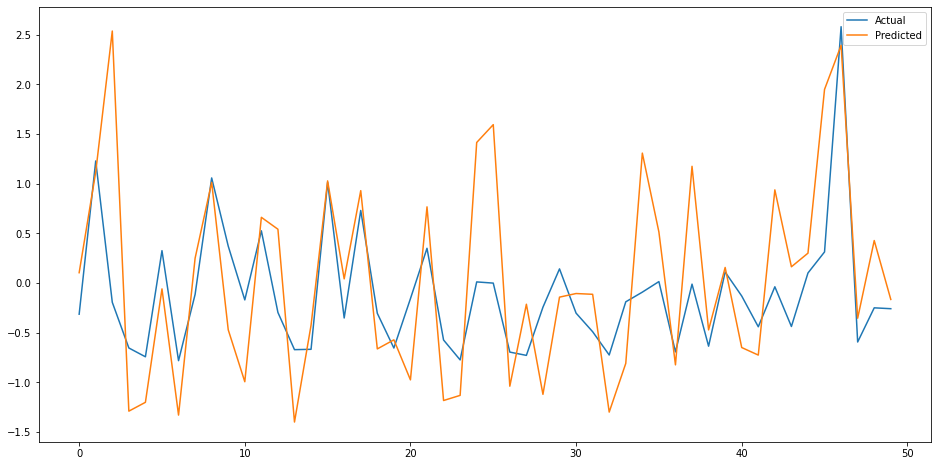

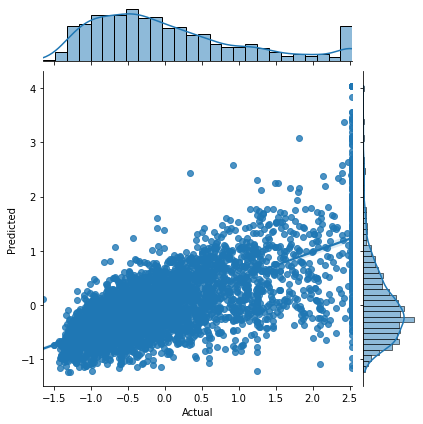

In [60]:
test = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

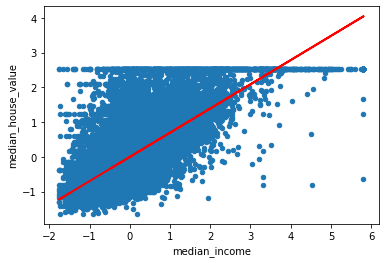

In [62]:
#plot least square line
scaled_df.plot(kind='scatter',x='median_income',y='median_house_value')
plt.plot(x_test,y_predict,c='red',linewidth=2)